# Classification

In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import miowad.nn as nn
from miowad.data import ClassificationDataset
from miowad.data import MinMaxScaler, StandardScaler, OneHotEncoder
from miowad.utils import set_seed

set_seed(123)

In [3]:
def plot_preds_classification(model, X_train_scaled, X_test_scaled, X_scaler, softmax=True) -> None:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    preds_train = model.forward(X_train_scaled)
    preds_test = model.forward(X_test_scaled)

    if softmax:
        preds_train = nn.softmax(preds_train)
        preds_test = nn.softmax(preds_test)

    preds_train = preds_train.argmax(axis=1)
    preds_test = preds_test.argmax(axis=1)

  # unnormalize data
    if X_scaler is not None:
        X_train = X_scaler.inverse_transform(X_train_scaled)
        X_test = X_scaler.inverse_transform(X_test_scaled)

    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=preds_train, legend=False, ax=ax1, )
    ax1.set_title("Training data")
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=preds_test, legend=False, ax=ax2, )
    ax2.set_title("Test data")
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_classification(model, X_train, y_train, X_test, y_test, softmax=True):

    preds_train = model.forward(X_train)
    preds_test = model.forward(X_test)

    if softmax:
        preds_train = nn.softmax(preds_train)
        preds_test = nn.softmax(preds_test)

    preds_train = preds_train.argmax(axis=1)
    preds_test = preds_test.argmax(axis=1)

    print("Training accuracy: ", accuracy_score(y_train, preds_train))
    print("Test accuracy: ", accuracy_score(y_test, preds_test,))
    print("-"*10)
    print("Training F1-score: ", f1_score(y_train, preds_train, average='macro'))
    print("Test F1-score: ", f1_score(y_test, preds_test, average='macro'))

## rings3-regular

In [ ]:
rings3_regular = ClassificationDataset('rings3-regular')
rings3_regular.plot_dataset()

In [ ]:
rings3_regular_train, rings3_regular_test = rings3_regular.to_df()

In [ ]:
X_train, y_train = rings3_regular_train[['x', 'y']].values, rings3_regular_train['c'].values.reshape(-1, 1)
X_test, y_test = rings3_regular_test[['x', 'y']].values, rings3_regular_test['c'].values.reshape(-1, 1)

In [ ]:
# let's scale the data for easier training
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.squeeze())
y_test_encoded = encoder.transform(y_test.squeeze())

In [ ]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 3),
])

### Cross-Entropy

In [12]:
model.init_weights('xavier_uniform')

In [13]:
# zdecydowałem użyć się Adama, ponieważ miałem problem z doborem hiperparametrów dla pozostałych algorytmów
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

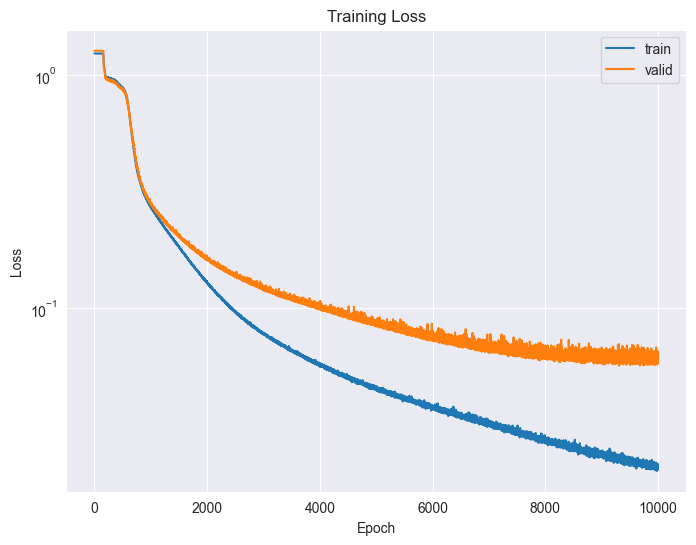

In [15]:
trainer.plot_training(ylog=True)

In [23]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy:  0.996
Test accuracy:  0.975
----------
Training F1-score:  0.996
Test F1-score:  0.9752485166503654


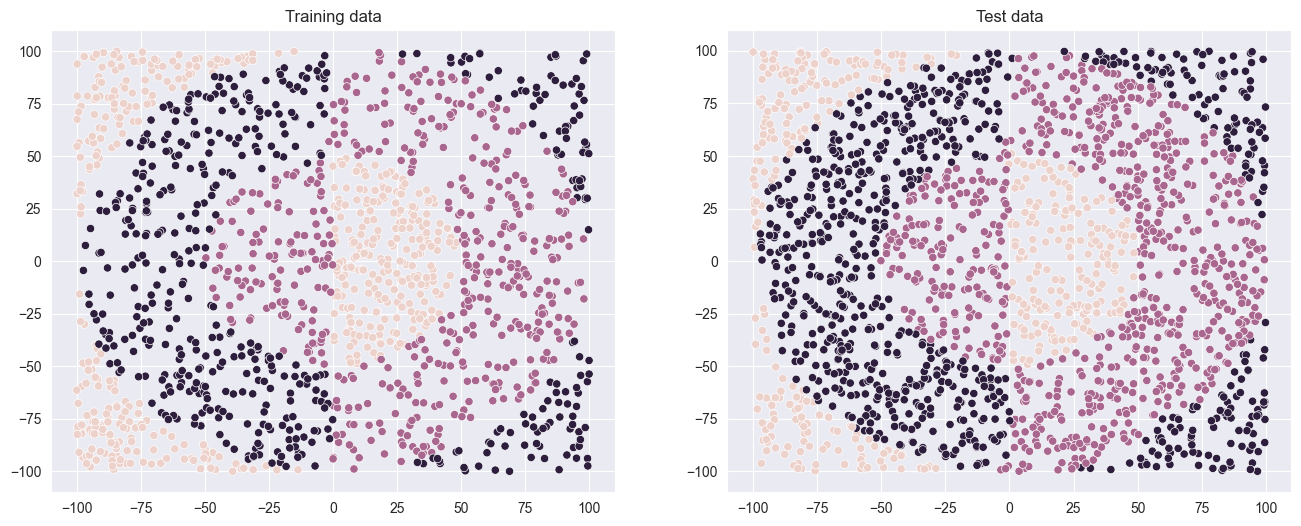

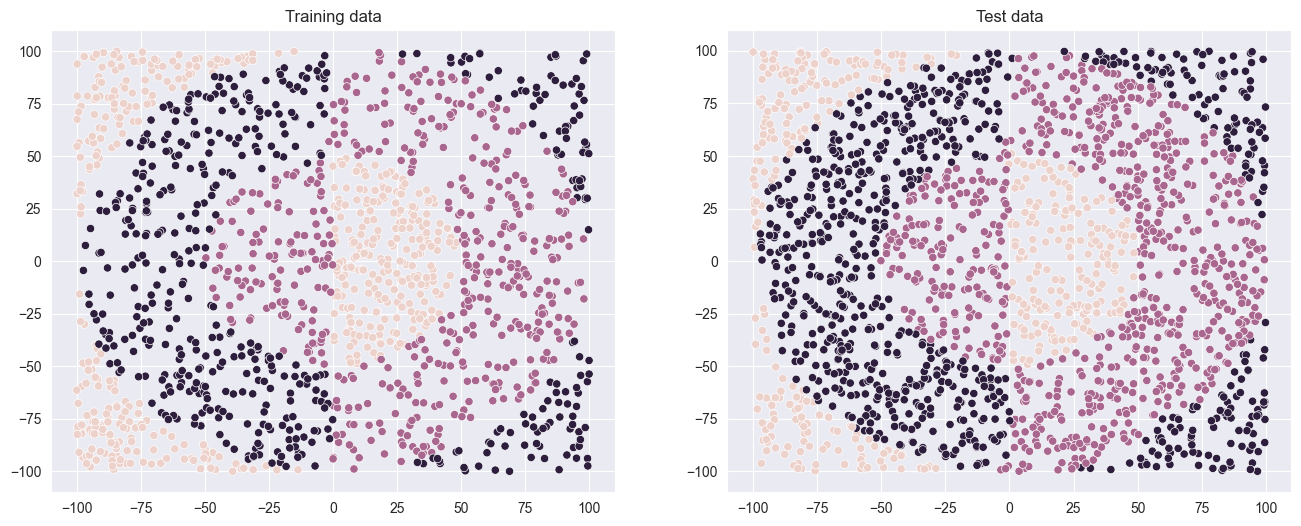

In [ ]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)

### MSE

In [10]:
set_seed(123)

In [11]:
model.init_weights('xavier_uniform')

In [12]:
optimizer = nn.optimizers.Adam(model.parameters, lr=0.001,)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=16, log_every=100)

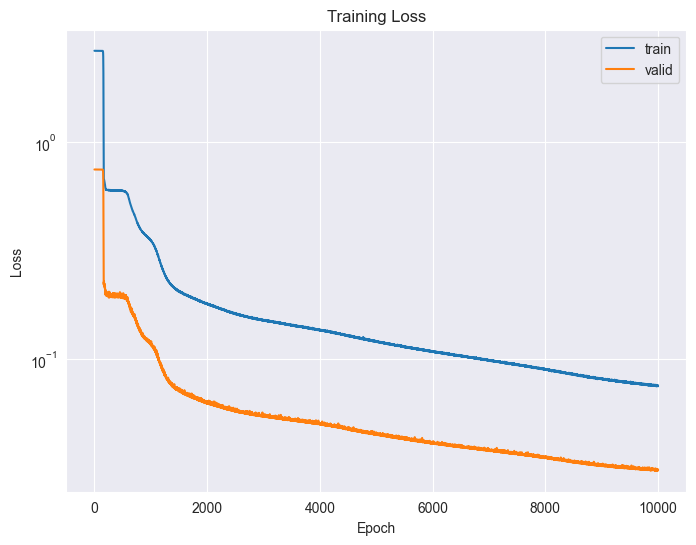

In [14]:
trainer.plot_training(ylog=True)

In [15]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test, softmax=False)

Training accuracy:  0.9773333333333334
Test accuracy:  0.9565
----------
Training F1-score:  0.9773477891088019
Test F1-score:  0.9566585950428875


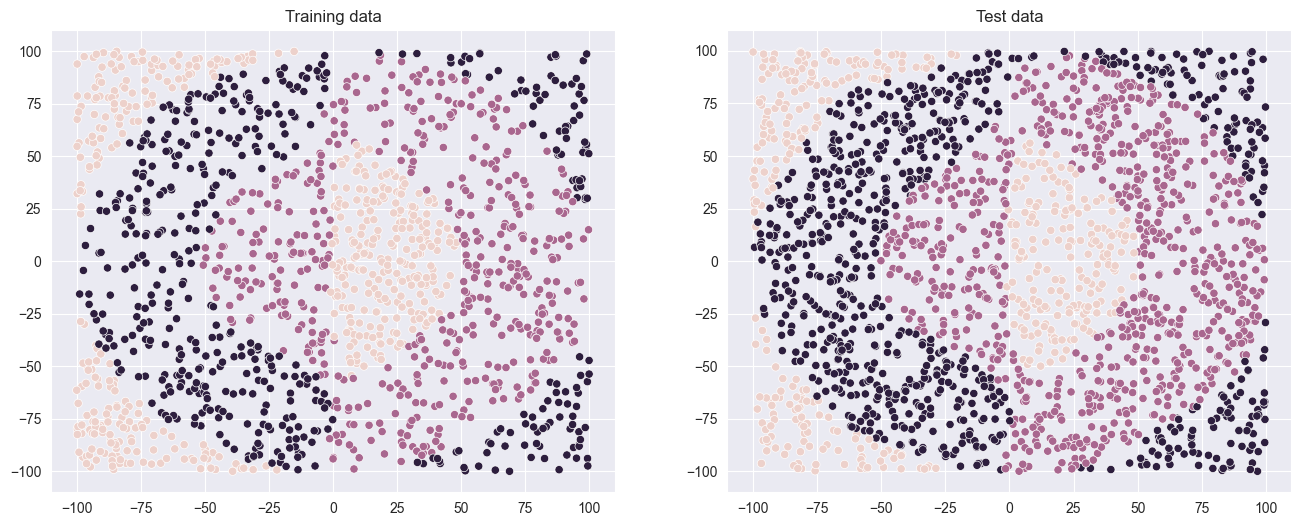

In [16]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)

## easy

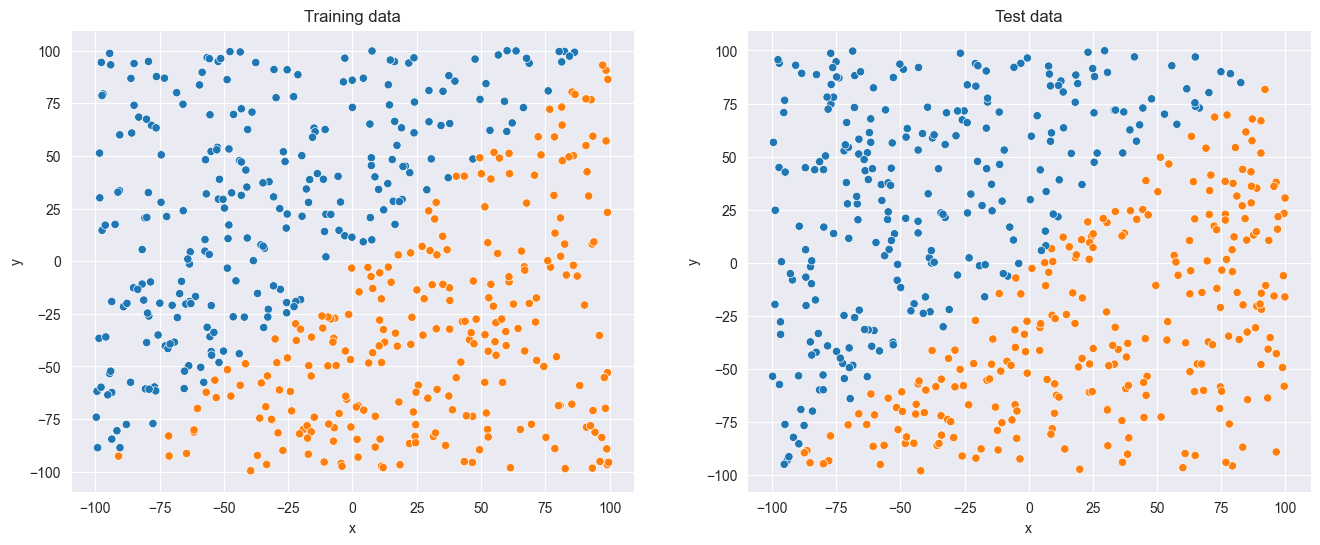

In [ ]:
easy = ClassificationDataset('easy')
easy.plot_dataset()

In [58]:
easy_train, easy_test = easy.to_df()

X_train, y_train = easy_train[['x', 'y']].values, easy_train['c'].values.reshape(-1, 1)
X_test, y_test = easy_test[['x', 'y']].values, easy_test['c'].values.reshape(-1, 1)

# let's scale the data for easier training
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.squeeze())
y_test_encoded = encoder.transform(y_test.squeeze())

In [59]:
model = nn.Sequential([
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 2),
])

### Cross-entropy

In [60]:
model.init_weights('xavier_uniform')

In [61]:
optimizer = nn.optimizers.RMSProp(model.parameters, lr=0.001, alpha=0.9)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=5000, batch_size=16, log_every=100)

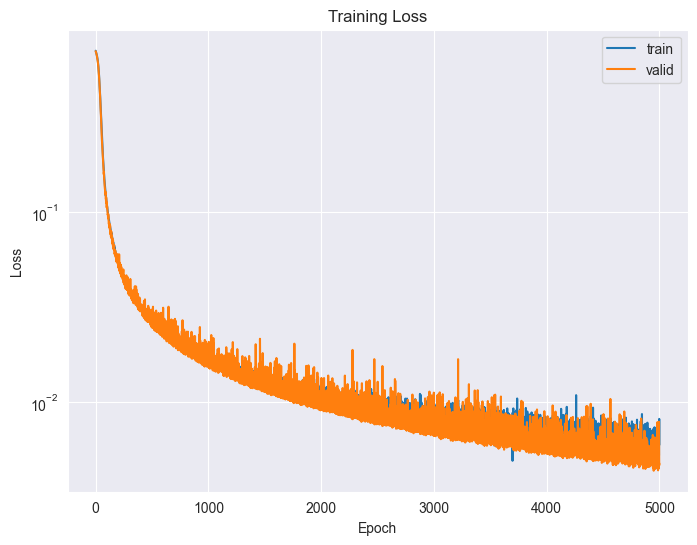

In [63]:
trainer.plot_training(ylog=True)

In [64]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy:  1.0
Test accuracy:  0.998
----------
Training F1-score:  1.0
Test F1-score:  0.9979999279974079


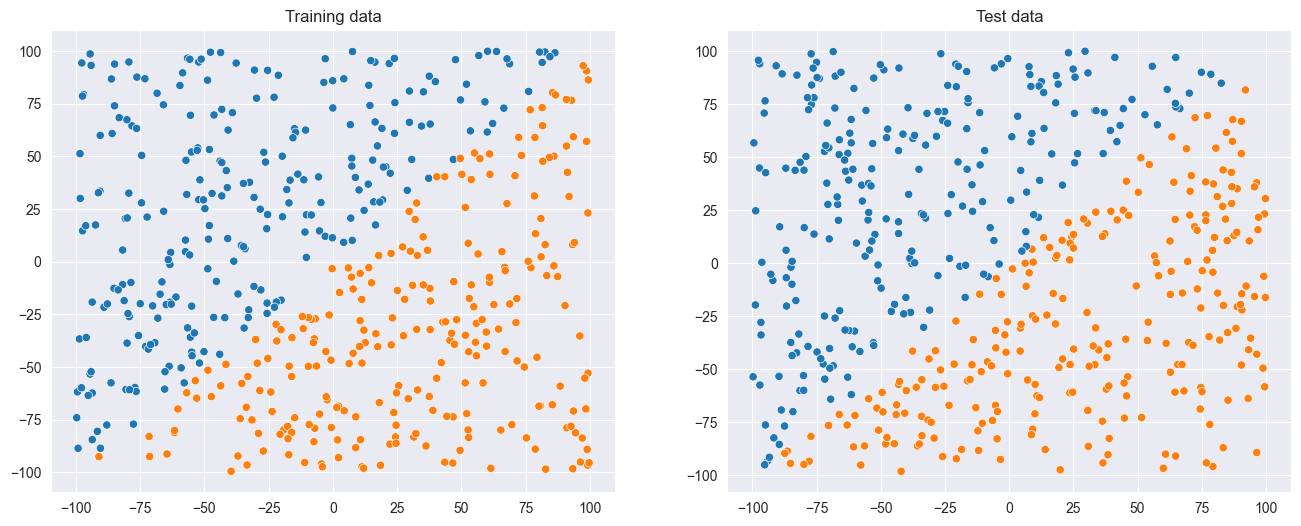

In [65]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)


### MSE

In [66]:
model.init_weights('xavier_uniform')

In [67]:
optimizer = nn.optimizers.RMSProp(model.parameters, lr=0.001, alpha=0.9)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=5000, batch_size=16, log_every=100)

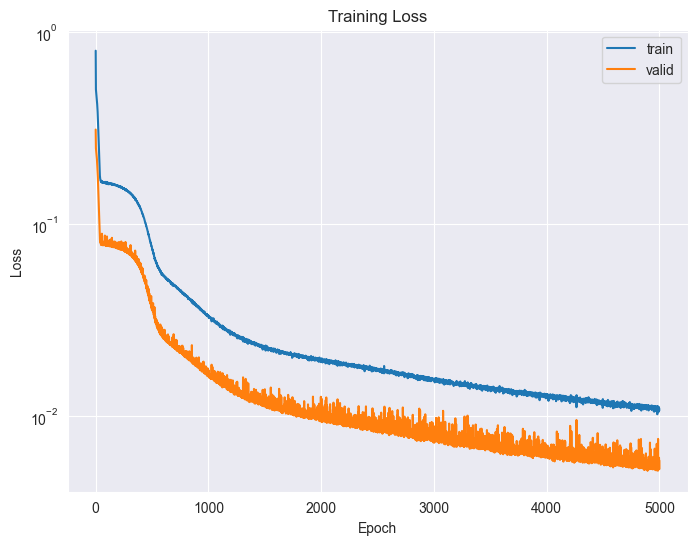

In [69]:
trainer.plot_training(ylog=True)

In [70]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test, softmax=False)

Training accuracy:  0.994
Test accuracy:  0.994
----------
Training F1-score:  0.9939997839922237
Test F1-score:  0.9939999759999041


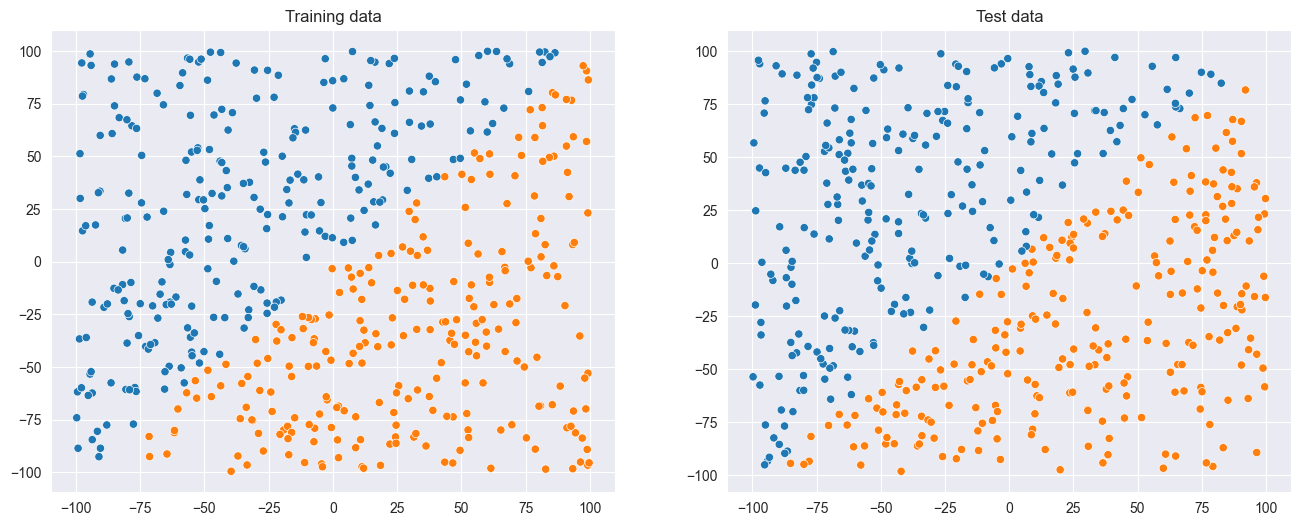

In [71]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)

## xor3

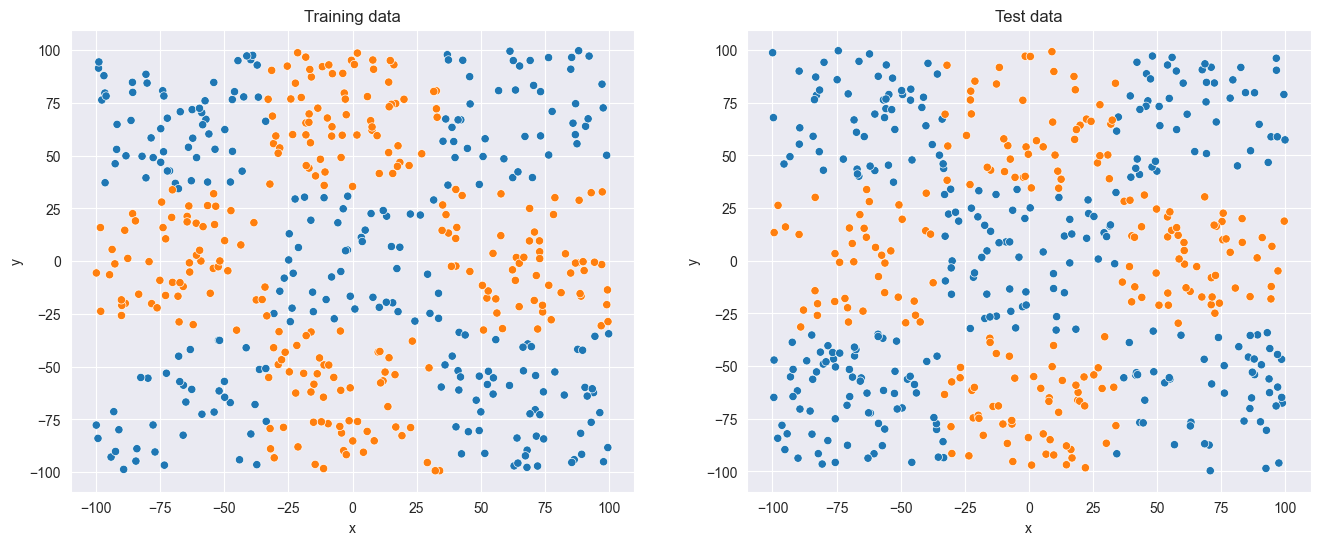

In [72]:
xor3 = ClassificationDataset('xor3')
xor3.plot_dataset()

In [73]:
xor3_train, xor3_test = xor3.to_df()

X_train, y_train = xor3_train[['x', 'y']].values, xor3_train['c'].values.reshape(-1, 1)
X_test, y_test = xor3_test[['x', 'y']].values, xor3_test['c'].values.reshape(-1, 1)

# let's scale the data for easier training
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.squeeze())
y_test_encoded = encoder.transform(y_test.squeeze())

In [113]:
model = nn.Sequential([
    nn.Linear(2, 5),
    nn.Sigmoid(),
    nn.Linear(5, 5),
    nn.Sigmoid(),
    nn.Linear(5, 2),
])

### Cross-entropy

In [114]:
model.init_weights('xavier_uniform')

In [115]:
optimizer = nn.optimizers.RMSProp(model.parameters, lr=3e-3, alpha=0.8)
criterion = nn.CrossEntropyLoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=12000, batch_size=32, log_every=100)

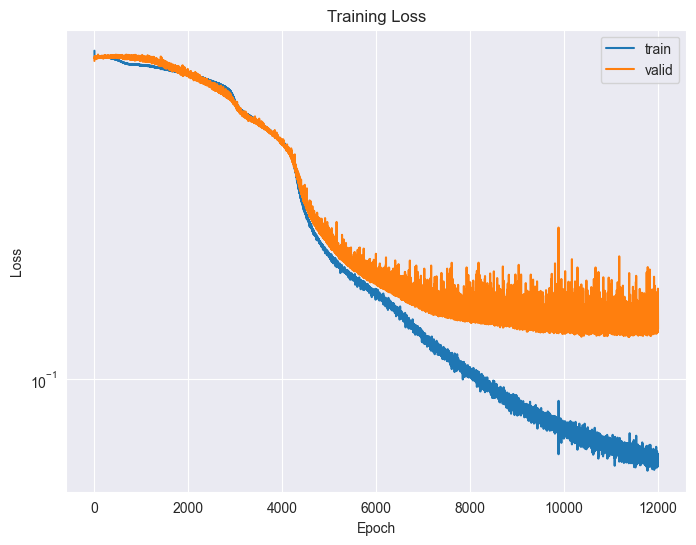

In [117]:
trainer.plot_training(ylog=True)

In [118]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test)

Training accuracy:  0.99
Test accuracy:  0.94
----------
Training F1-score:  0.98999995999984
Test F1-score:  0.938503419209892


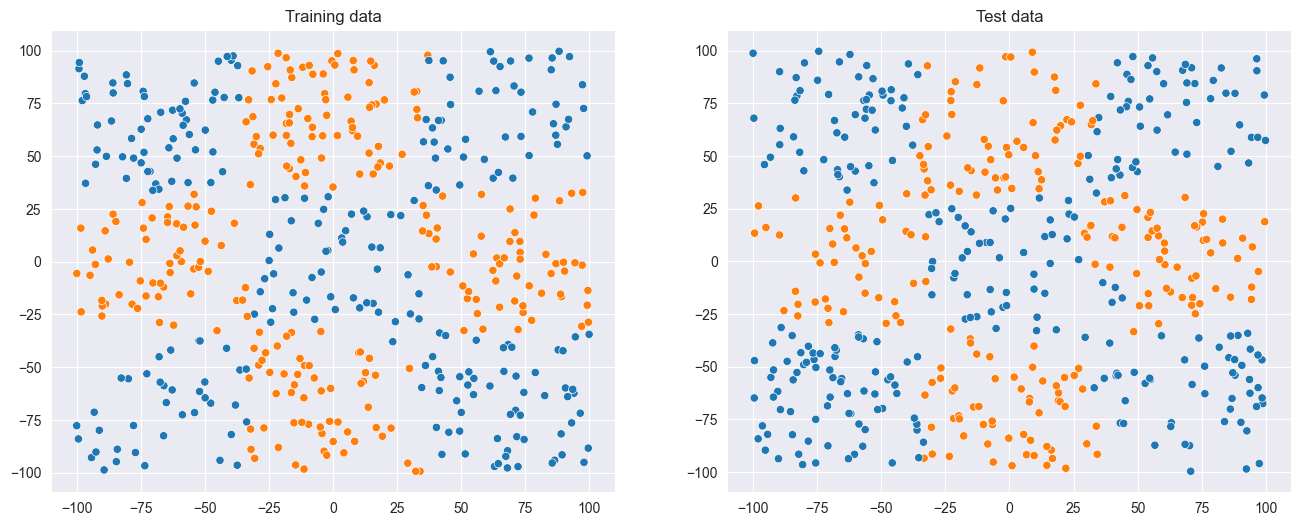

In [119]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)

### MSE

In [120]:
model.init_weights('xavier_uniform')

In [121]:
optimizer = nn.optimizers.RMSProp(model.parameters, lr=3e-3, alpha=0.8)
criterion = nn.MSELoss()
trainer = nn.Trainer(model, optimizer, criterion)

In [ ]:
trainer.train(X_train_scaled, y_train_encoded, X_valid=X_test_scaled, y_valid=y_test_encoded, num_epochs=10000, batch_size=32, log_every=100)

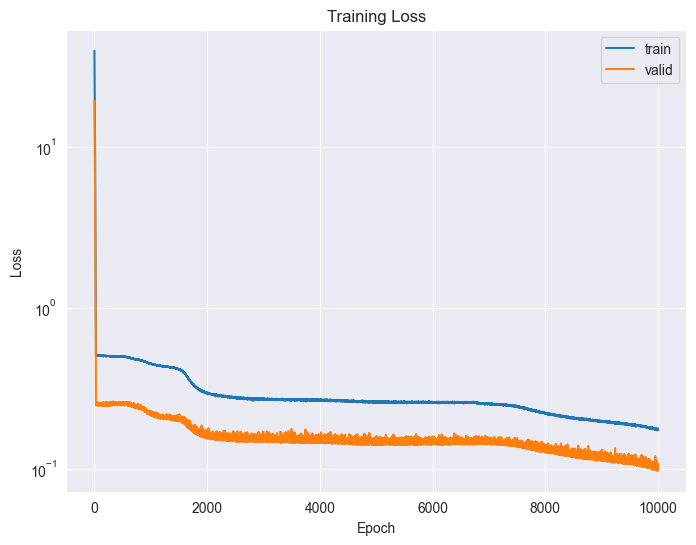

In [123]:
trainer.plot_training(ylog=True)

In [125]:
evaluate_classification(model, X_train_scaled, y_train, X_test_scaled, y_test, softmax=False)

Training accuracy:  0.892
Test accuracy:  0.854
----------
Training F1-score:  0.8918269230769229
Test F1-score:  0.8531062987214211


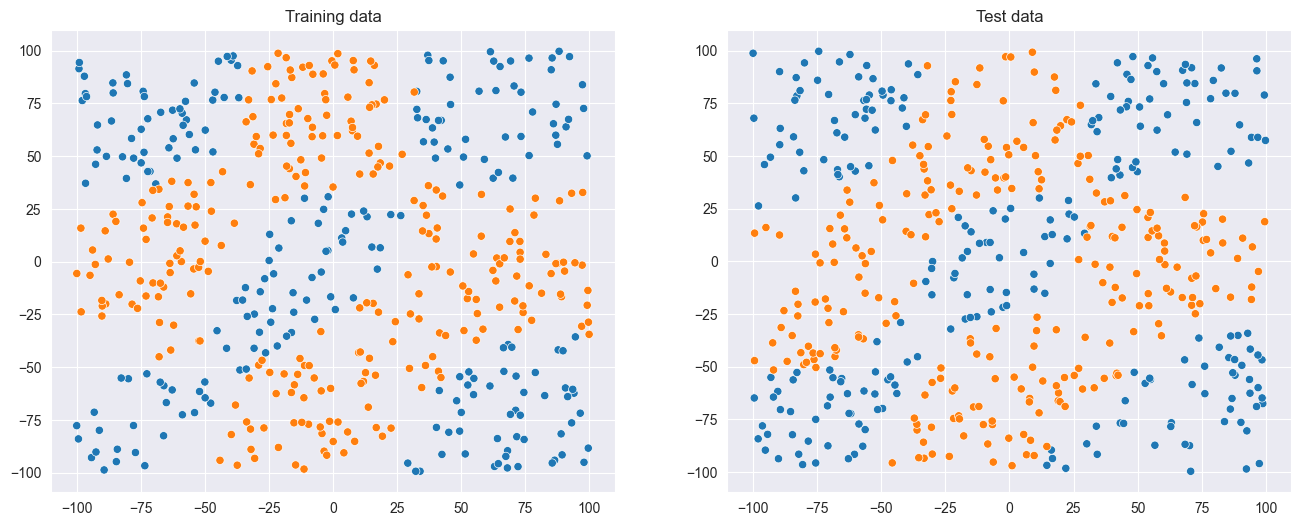

In [126]:
plot_preds_classification(model, X_train_scaled, X_test_scaled, scaler)